# Одномерное уравнение Пуассона и его аналитическое решение

Одномерное уравнение Пуассона имеет вид:

$$
-\frac{d^2u}{dx^2} = f(x),
$$

где u(x) - искомая функция, а f(x) - заданная функция.

**Решаемое уравнение**:

$$
\frac{d^2u}{dx^2} = -\sin(x)
$$



In [ ]:
from sympy import Function, dsolve, Eq, Derivative, sin, symbols, plot
from sympy.abc import x

# Определяем искомую функцию u
u = Function('u')
# Задаем функцию f
f = sin(x)

# Строим уравнение Пуассона
poisson_eq = Eq(Derivative(u(x), x, x), -f)

# Решаем уравнение Пуассона
solution = dsolve(poisson_eq, u(x))

# Выводим решение
print(solution)

Eq(u(x), C1 + C2*x + sin(x))


Eq(u(x), C1 + C2*x + sin(x))


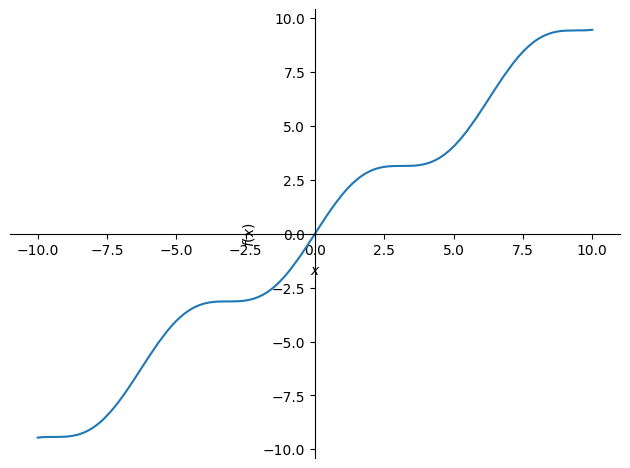

In [3]:
# Определяем искомую функцию u и константы C1 и C2
u = Function('u')(x)
C1, C2 = symbols('C1 C2')
# Задаем функцию f
f = sin(x)

# Строим уравнение Пуассона
poisson_eq = Eq(Derivative(u, x, x), -f)

# Решаем уравнение Пуассона
solution = dsolve(poisson_eq, u)

# Выводим решение
print(solution)

# Визуализируем решение, подставляя конкретные значения для C1 и C2
plot(solution.rhs.subs({C1: 0, C2: 1}), (x, -10, 10))

# Численное решение двумерного уравнения Пуассона с использованием метода конечных разностей

Основные понятия:

1. **Формулировка уравнения Пуассона**:  Уравнение Пуассона для потенциала $\phi$ \(phi\) с источниковым членом $f(x, y)$ в двумерной области $\Omega$ (omega) выглядит следующим образом:
$$
∇^2ϕ=−f(x,y),(x,y)∈Ω
$$

 где $\nabla^2$ - оператор Лапласа.

2. **Дискретизация области**: Область $\Omega$ разбивается на сетку с узлами, расположенными на равном расстоянии друг от друга по обеим координатным осям. Шаг сетки по оси $x$ обозначается как $dx$, а по оси $y$ - как $dy$.

3. **Разностная аппроксимация**: Производные в уравнении Пуассона заменяются разностными аппроксимациями. Например, вторая производная по $x$ в точке $(i, j)$ аппроксимируется как:
$$
\frac{\partial^2 \phi}{\partial x^2} \approx \frac{\phi_{i+1,j} - 2\phi_{i,j} + \phi_{i-1,j}}{dx^2}
$$
Аналогично аппроксимируется вторая производная по $y$:
$$
\frac{\partial^2 \phi}{\partial y^2} \approx \frac{\phi_{i+1,j} - 2\phi_{i,j} + \phi_{i-1,j}}{dy^2}
$$

4. **Система линейных уравнений**: После аппроксимации производных, для каждого внутреннего узла сетки формируется линейное уравнение. Все эти уравнения вместе образуют систему линейных алгебраических уравнений.

5. **Граничные условия**: Для узлов, расположенных на границе области $\Omega$, необходимо учесть граничные условия. Это могут быть условия Дирихле (заданные значения потенциала на границе), Неймана (заданные значения производной потенциала на границе) или смешанные условия.

6. **Методы решения системы уравнений**: Полученная система уравнений может быть решена различными численными методами, такими как метод простой итерации, метод Гаусса-Зейделя, метод сопряженных градиентов или метод релаксации.

7. **Анализ сходимости и устойчивости**: Важно провести анализ сходимости и устойчивости используемого численного метода, чтобы гарантировать, что решение будет приближаться к истинному решению уравнения Пуассона при уменьшении шага сетки.

Точность и эффективность численного решения зависят от выбора шага сетки, типа граничных условий и метода решения системы уравнений.

**Пятиточечный шаблон разностной аппроксимации**:
$$
u_{new}[j, i] = \frac{(u[j, i+1] + u[j, i-1]) \cdot dy^2 +
(u[j+1, i] + u[j-1, i]) \cdot dx^2 -
f[j, i] \cdot dx^2 \cdot dy^2}{2 \cdot (dx^2 + dy^2)}
$$

Эта формула используется для обновления значения в каждой внутренней точке сетки (j, i). Здесь:

- $u[j, i+1]$, $u[j, i-1]$, $u[j+1, i]$ и $u[j-1, i]$ - это значения в четырех соседних точках вокруг текущей точки $(j, i)$. Эти четыре точки и текущая точка $(j, i)$ образуют пятиточечный шаблон.
- $dx$ и $dy$ - это шаги сетки по осям x и y соответственно.
- $f[j, i]$ - это значение функции f в точке $(j, i)$.

Пятиточечный шаблон используется для аппроксимации вторых производных в уравнении Пуассона. Это делается путем усреднения значений в четырех соседних точках и вычитания из этого значения в центральной точке, а затем деления на квадрат шага сетки. Это дает аппроксимацию второго порядка для второй производной. Этот метод особенно эффективен при решении уравнений Пуассона на больших сетках. Он использует итерационный подход и метод релаксации для ускорения сходимости. Параметр релаксации omega можно настроить для оптимизации процесса сходимости. При этом важно правильно выбрать критерий остановки, чтобы обеспечить достаточную точность решения.

**Метод релаксации** — это итерационный метод решения систем линейных алгебраических уравнений, который используется для ускорения сходимости простых итерационных методов. Он особенно эффективен при решении систем с большим количеством неизвестных. Метод релаксации включает в себя следующие шаги:

1. **Инициализация**: Выбирается начальное приближение решения.
2. **Итерационный процесс**: На каждом шаге обновляются значения решения с использованием релаксационного параметра $\Omega$.
3. **Релаксация**: Применяется взвешенное среднее между предыдущим и новым решением для улучшения сходимости.
4. **Проверка сходимости**: Итерации продолжаются до тех пор, пока норма разности между последовательными приближениями не станет меньше заданной точности $tol$.

**Решаемое уравнение**:
$$
\nabla^2 u(x, y) = -\sin(\pi x) \cos(\pi y),
$$
Уравнение такого рода может использоваться:
- Распределение температуры в однородном материале, когда в определенной точке поддерживается постоянный источник тепла.
- Электростатический потенциал в области пространства с заданным распределением заряда.
- Распределение давления в жидкости или газе при наличии источников и стоков.

Источник установлен в одной точке сетки, что может соответствовать, например, точечному источнику тепла или заряда. Метод релаксации, помогает найти стационарное распределение функции $u$, которое соответствует установившемуся состоянию системы в ответ на заданные условия и источники.

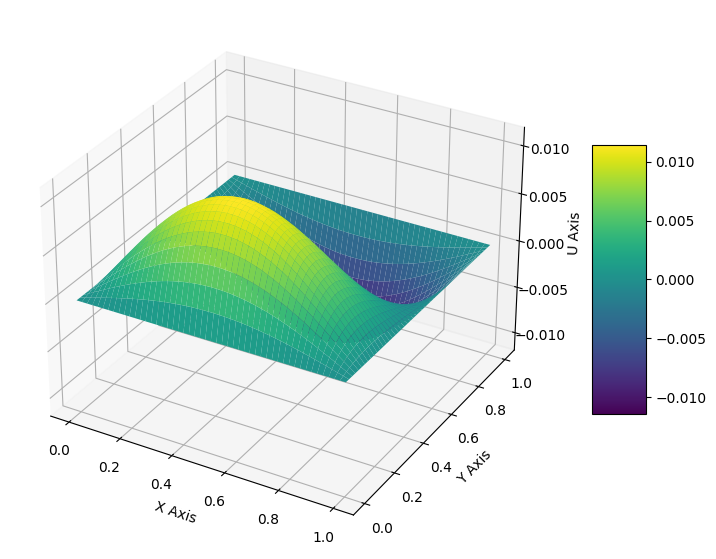

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры сетки
nx, ny = 50, 50  # Размер сетки
dx, dy = 1.0 / (nx - 1), 1.0 / (ny - 1)  # Шаг сетки

# Создаем сетку
x = np.linspace(0, 1, nx)  # Равнораспределенные значения от 0 до 1
y = np.linspace(0, 1, ny)  # Равнораспределенные значения от 0 до 1
X, Y = np.meshgrid(x, y)   # Создание двумерной сетки координат

# Инициализируем решение
u = np.zeros((ny, nx))  # Массив заполненный нулями

# Задаем функцию
f = -np.sin(np.pi * X) * np.cos(np.pi * Y)

# Параметры релаксации
omega = 1.106  # Параметр релаксации !!!При увеличении идет переполнение 030147
tol = 1e-4  # Точность !!!При увеличении идет переполнение
maxiter = 10000  # Максимальное количество итераций

# Функция для решения уравнения Пуассона методом релаксации
def poisson_2d_relaxation(u, f, dx, dy, omega, tol, maxiter):
    ny, nx = u.shape

    for it in range(maxiter):
        # Создание копии массива u для хранения новых значений на текущей итерации.
        unew = u.copy()

        # Обновляем значения внутри области
        # Двойной цикл для обхода внутренних точек сетки, исключая граничные точки.
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                # Обновление значения в точке (j, i) с использованием пятиточечного
                # шаблона разностной аппроксимации и функции.
                unew[j, i] = ((u[j, i+1] + u[j, i-1]) * dy**2 +
                              (u[j+1, i] + u[j-1, i]) * dx**2 -
                              f[j, i] * dx**2 * dy**2) / (2 * (dx**2 + dy**2))

        # новое значение u вычисляется как взвешенное среднее между старым
        # и новым значениями с весом omega
        u = omega * unew + (1 - omega) * u

        # Проверяем сходимость
        if np.linalg.norm(u - unew, ord=np.inf) < tol:
            break

    return u, it

# Решаем уравнение Пуассона
u, iters = poisson_2d_relaxation(u, f, dx, dy, omega, tol, maxiter)

# Создаем фигуру для визуализации
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')

# Визуализируем решение
surf = ax.plot_surface(X, Y, u, cmap='viridis')

# Добавляем цветовую шкалу для ориентира
fig.colorbar(surf, shrink=0.5, aspect=5)

# Настраиваем оси
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('U Axis')

# Показываем график
plt.show()

In [ ]:
print(f"Решение сходится за {iters} итераций")

Решение сходится за 189 итераций


# Метод функции Грина и решение двумерного уравнения Пуассона

**Метод функции Грина** - это метод решения линейных дифференциальных уравнений, который позволяет получить частное решение уравнения, используя функцию Грина, соответствующую оператору этого уравнения. Такой метод является аналитическим. Для двумерного уравнения Пуассона, которое является эллиптическим уравнением вида:
$$
∇^2ϕ=f,
$$
где $\nabla^2$ - оператор Лапласа, $\phi$ - искомая функция, а $f$ - заданная функция-источник, функция Грина может быть использована для нахождения решения в области с заданными граничными условиями.

**Решаемое уравнение**
$$
∇^2ϕ(x,y)=\sin(\sqrt{x^2 + y^2}),
$$
Функция Грина для такой задачи в бесконечной области имеет вид:
$$
G(x, y; \xi, \eta) = -\frac{1}{2\pi} \ln{\sqrt{(x - \xi)^2 + (y - \eta)^2}}
$$
где $(x, y)$ - координаты точки наблюдения, а $(\xi, \eta)$ - координаты точки источника.


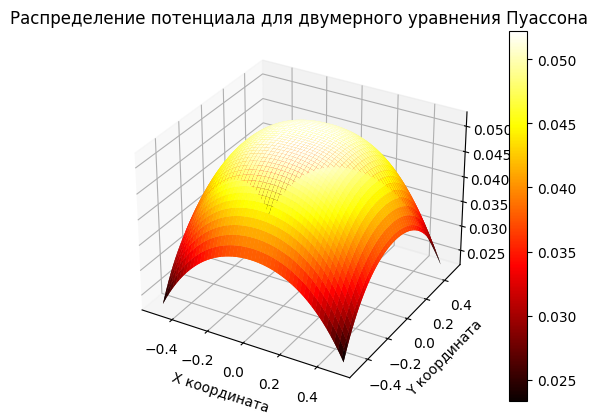

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задаем размеры сетки и количество точек
grid_size = 100
h = 1.0 / grid_size
x = np.linspace(-0.5, 0.5, grid_size)
y = np.linspace(-0.5, 0.5, grid_size)
X, Y = np.meshgrid(x, y)

# Функция Грина
def green_function(x, y, xi, eta):
    r = np.sqrt((x - xi)**2 + (y - eta)**2)  # Задаем функцию Грина
    # Используем контекстный менеджер для игнорирования
    # предупреждений при делении на ноль
    with np.errstate(divide='ignore'):
        # Вычисляем функцию Грина G как логарифмический потенциал
        G = -1/(2*np.pi) * np.log(r)
        # Заменяем бесконечные значения в G на ноль,
        # чтобы обработать логарифмическую особенность
        G[np.isinf(G)] = 0
        # Обрабатываем неопределенность при r=0
        G[np.isnan(G)] = 0
    return G

# Функция
f = np.sin(np.sqrt(X ** 2 + Y ** 2))

# Решение уравнения Пуассона через интеграл функции Грина
# Инициализируем массив phi нулями
phi = np.zeros((grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        # Вычисляем значение потенциала phi в точке (i, j) как сумму произведений
        # значений функции Грина и функции f, умноженных на квадрат шага сетки h
        phi[i, j] = np.sum(green_function(X, Y, X[i, j], Y[i, j]) * f * h**2)

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Визуализация результата
ax.plot_surface(X, Y, phi, cmap='hot')

# Тепловая карта
surf = ax.plot_surface(X, Y, phi, cmap='hot')
plt.colorbar(surf)

# Подписи
ax.set_title('Распределение потенциала для двумерного уравнения Пуассона')
ax.set_xlabel('X координата')
ax.set_ylabel('Y координата')
ax.set_zlabel('Потенциал φ')
plt.show()

Функция $f(x,y)$:
$$
f=\text{sin}(\pi \cdot x) \cdot \text{cos}(\pi \cdot y)
$$

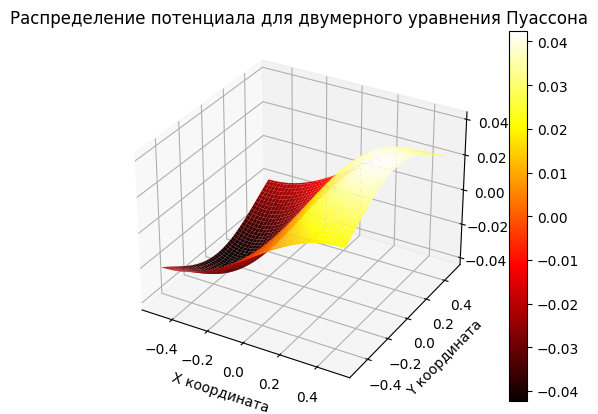

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задаем размеры сетки и количество точек
grid_size = 100
h = 1.0 / grid_size
x = np.linspace(-0.5, 0.5, grid_size)
y = np.linspace(-0.5, 0.5, grid_size)
X, Y = np.meshgrid(x, y)

# Функция Грина
def green_function(x, y, xi, eta):
    r = np.sqrt((x - xi)**2 + (y - eta)**2)
    with np.errstate(divide='ignore', invalid='ignore'):
        G = -1/(2*np.pi) * np.log(r)
        G[np.isinf(G)] = 0  # Обрабатываем логарифмическую особенность
        G[np.isnan(G)] = 0  # Обрабатываем неопределенность при r=0
    return G

# Функция
f = np.sin(np.pi * X) * np.cos(np.pi * Y)

# Решение уравнения Пуассона через интеграл функции Грина
phi = np.zeros((grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        phi[i, j] = np.sum(green_function(X, Y, X[i, j], Y[i, j]) * f * h**2)

# Создаем 3D-график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Визуализация результата
surf = ax.plot_surface(X, Y, phi, cmap='hot')
plt.colorbar(surf)
ax.set_title('Распределение потенциала для двумерного уравнения Пуассона')
ax.set_xlabel('X координата')
ax.set_ylabel('Y координата')
ax.set_zlabel('Потенциал φ')
plt.show()

# Маятник

**Дано**. Двойной маятник: система 2 грузов с заданными массами m1 , m2, подвешенных на нитях длиной l1 , l2, как показано на рисунке, при этом рассматривается случай  движения в вертикальной плоскости. Считать, что в начальный момент времени грузы отклонены на углы α1 , α2, которые отсчитаны от вертикальной линии (в состоянии равновесия они равны нулю).

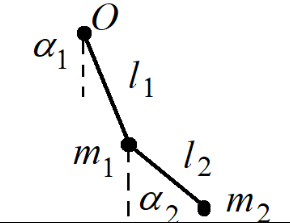

Для системы, которая покоится  в начальный момент времени, следует:

1. Построить зависимости координат грузов αi(t) от времени.

2. Построить зависимости скоростей грузов vi(t) от времени.

3. Построить анимацию движения системы (5-10 сек.).

4. Провести эксперимент и сравнить положение системы через 5 сек. с результатами расчёта  

5. Исследовать поведение системы в зависимости от величины X. Найти при каких значениях Х модель хорошо описывает движение системы.

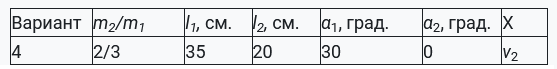

## 1) Построить зависимости координат грузов αi(t) от времени.

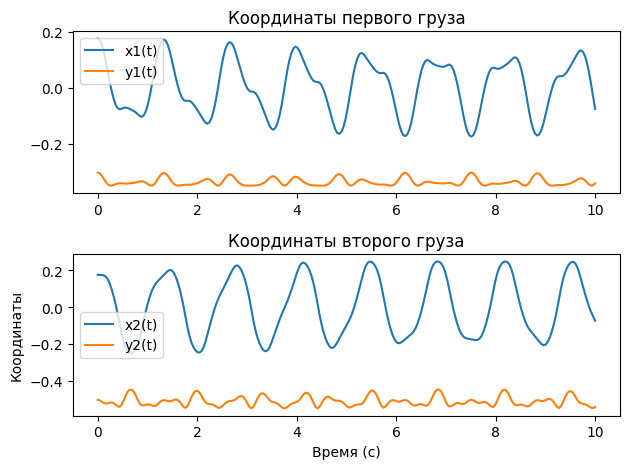

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Определение констант
m1 = 1  # Масса первого груза
m2 = 2/3 * m1  # Масса второго груза, равная двум третям от массы первого груза
l1 = 0.35  # Длина первой нити в метрах
l2 = 0.20  # Длина второй нити в метрах
a1 = np.radians(30)  # Перевод начального угла отклонения первого груза из градусов в радианы
a2 = np.radians(0)  # Перевод начального угла отклонения второго груза из градусов в радианы (в данном случае 0 радиан)
g = 9.81  # Ускорение свободного падения (примерно равно 9.81 м/с²)

# Функция с уравнениями движения маятника
def equations(y, t, l1, l2, m1, m2):
    theta1, z1, theta2, z2 = y  # Распаковка списка переменных состояния маятника
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)  # Вычисление косинуса и синуса разности углов

    theta1_dot = z1  # Производная угла theta1 по времени, равная угловой скорости z1
    # Производная угловой скорости z1 по времени
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)

    theta2_dot = z2  # Производная угла theta2 по времени, равная угловой скорости z2
    # Производная угловой скорости z2 по времени
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return theta1_dot, z1_dot, theta2_dot, z2_dot  # Возвращение производных как кортеж

# Начальные условия для интегрирования
y0 = [a1, 0, a2, 0]  # Начальные углы и угловые скорости (угловые скорости равны 0, так как система покоится)

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # Создание массива временных точек от 0 до 10 секунд, 250 точек

# Решение системы дифференциальных уравнений
solution = odeint(equations, y0, t, args=(l1, l2, m1, m2))  # Интегрирование уравнений движения

# Извлечение решений для углов
theta1, theta2 = solution[:, 0], solution[:, 2]  # Получение массивов углов theta1 и theta2 из решения

# Вычисление координат грузов
x1 = l1 * np.sin(theta1)  # X координата первого груза
y1 = -l1 * np.cos(theta1)  # Y координата первого груза
x2 = x1 + l2 * np.sin(theta2)  # X координата второго груза
y2 = y1 - l2 * np.cos(theta2)  # Y координата второго груза

# Построение графиков зависимостей координат от времени
plt.figure()

plt.subplot(2, 1, 1)  # Создание подграфика для первого груза
plt.plot(t, x1, label='x1(t)')  # Построение графика X координаты первого груза
plt.plot(t, y1, label='y1(t)')  # Построение графика Y координаты первого груза
plt.legend()
plt.title('Координаты первого груза')

plt.subplot(2, 1, 2)  # Создание подграфика для второго груза
plt.plot(t, x2, label='x2(t)')  # Построение графика X координаты второго груза
plt.plot(t, y2, label='y2(t)')  # Построение графика Y координаты второго груза
plt.legend()
plt.title('Координаты второго груза')

plt.xlabel('Время (с)')
plt.ylabel('Координаты')
plt.tight_layout()  # Автоматическая корректировка подграфиков для лучшего отображения
plt.show()

## 2) Построить зависимости скоростей грузов vi(t) от времени.

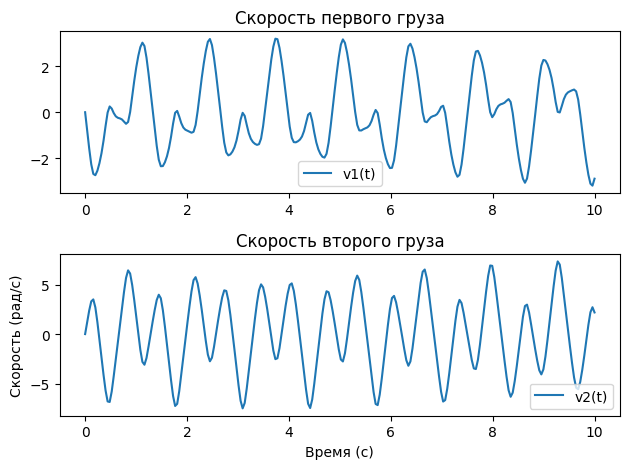

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Определение констант
m1 = 1  # Масса первого груза
m2 = 2/3 * m1  # Масса второго груза, равная двум третям массы первого груза
l1 = 0.35  # Длина первой нити в метрах
l2 = 0.20  # Длина второй нити в метрах
a1 = np.radians(30)  # Начальный угол отклонения первого груза, переведенный в радианы
a2 = np.radians(0)  # Начальный угол отклонения второго груза, переведенный в радианы
g = 9.81  # Ускорение свободного падения в м/с^2

# Функция с уравнениями движения маятника
def equations(y, t, l1, l2, m1, m2):
    theta1, z1, theta2, z2 = y  # Распаковка переменных: углы (theta1, theta2) и угловые скорости (z1, z2)
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)  # Вычисление косинуса и синуса разности углов

    theta1_dot = z1  # Производная угла theta1 по времени, равная угловой скорости
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)  # Производная угловой скорости z1 по времени

    theta2_dot = z2  # Производная угла theta2 по времени, равная угловой скорости
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)  # Производная угловой скорости z2 по времени

    return theta1_dot, z1_dot, theta2_dot, z2_dot  # Возвращение производных

# Начальные условия для интегрирования
y0 = [a1, 0, a2, 0]  # Начальные углы и начальные угловые скорости (предполагается, что начальная скорость равна 0)

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # Создание массива временных точек от 0 до 10 секунд

# Решение системы дифференциальных уравнений
solution = odeint(equations, y0, t, args=(l1, l2, m1, m2))  # Интегрирование уравнений движения

# Извлечение решений для угловых скоростей
z1, z2 = solution[:, 1], solution[:, 3]  # Получение массивов угловых скоростей z1 и z2 из решения

# Построение графиков зависимостей скоростей от времени
plt.figure()

plt.subplot(2, 1, 1)  # Создание подграфика для первого груза
plt.plot(t, z1, label='v1(t)')  # Построение графика угловой скорости первого груза
plt.legend()
plt.title('Скорость первого груза')

plt.subplot(2, 1, 2)  # Создание подграфика для второго груза
plt.plot(t, z2, label='v2(t)')  # Построение графика угловой скорости второго груза
plt.legend()
plt.title('Скорость второго груза')

plt.xlabel('Время (с)')
plt.ylabel('Скорость (рад/с)')
plt.tight_layout()  # Автоматическая корректировка подграфиков для лучшего отображения
plt.show()

## 3) Построить анимацию движения системы (5-10 сек.).

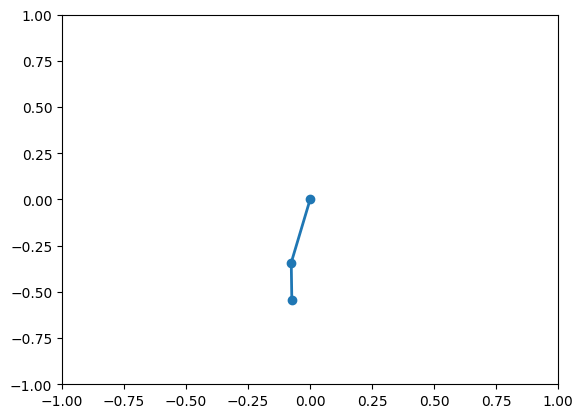

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Определение констант
m1, m2 = 1, 2/3  # Массы грузов m1 и m2
l1, l2 = 0.35, 0.20  # Длины нитей l1 и l2
a1, a2 = np.radians(30), np.radians(0)  # Начальные углы отклонения в радианах
g = 9.81  # Ускорение свободного падения

# Функция с уравнениями движения маятника
def equations(y, t, l1, l2, m1, m2):
    theta1, z1, theta2, z2 = y  # Углы и угловые скорости
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)  # Косинус и синус разности углов

    # Уравнения для первого маятника
    theta1_dot = z1  # Производная угла theta1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)  # Производная угловой скорости z1

    # Уравнения для второго маятника
    theta2_dot = z2  # Производная угла theta2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)  # Производная угловой скорости z2

    return theta1_dot, z1_dot, theta2_dot, z2_dot  # Возвращаем производные

# Начальные условия для интегрирования
y0 = [a1, 0, a2, 0]  # Начальные углы и угловые скорости

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # От 0 до 10 секунд, 250 точек

# Решение системы дифференциальных уравнений
solution = odeint(equations, y0, t, args=(l1, l2, m1, m2))  # Интегрирование

# Извлечение решений для углов
theta1, theta2 = solution[:, 0], solution[:, 2]  # Углы theta1 и theta2

# Вычисление координат грузов
x1 = l1 * np.sin(theta1)  # X координата первого груза
y1 = -l1 * np.cos(theta1)  # Y координата первого груза
x2 = x1 + l2 * np.sin(theta2)  # X координата второго груза
y2 = y1 - l2 * np.cos(theta2)  # Y координата второго груза

# Подготовка к анимации
fig, ax = plt.subplots()  # Создание фигуры и осей
ax.set_xlim(-1, 1)  # Установка пределов осей X
ax.set_ylim(-1, 1)  # Установка пределов осей Y
line, = ax.plot([], [], 'o-', lw=2)  # Инициализация линии для анимации

# Функция инициализации анимации
def init():
    line.set_data([], [])  # Очистка данных линии
    return line,  # Возвращаем элементы для анимации

# Функция анимации
def animate(i):
    x = [0, x1[i], x2[i]]  # X координаты для анимации
    y = [0, y1[i], y2[i]]  # Y координаты для анимации
    line.set_data(x, y)  # Обновление данных линии
    return line,  # Возвращаем элементы для анимации

# Создание объекта анимации
ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True)


HTML(ani.to_html5_video())

## 4) Провести эксперимент и сравнить положение системы через 5 сек. с результатами расчёта

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Определение констант
m1, m2 = 1, 2/3  # Массы грузов m1 и m2
l1, l2 = 0.35, 0.20  # Длины нитей l1 и l2
a1, a2 = np.radians(30), np.radians(0)  # Начальные углы отклонения в радианах
g = 9.81  # Ускорение свободного падения

# Временной интервал для симуляции
t = np.linspace(0, 10, 250)  # От 0 до 10 секунд, 250 точек

# Функция для вычисления теоретических положений грузов
def theoretical_positions(m1, m2, l1, l2, a1, a2, g, t):
    # Теоретические вычисления могут быть сложными из-за нелинейности системы,
    # но для малых углов можно использовать приближенные формулы
    # Например, для малых колебаний:
    w1 = np.sqrt(g / l1)  # Частота колебаний первого маятника
    w2 = np.sqrt(g / l2)  # Частота колебаний второго маятника

    # Положения грузов в зависимости от времени
    x1_theoretical = l1 * np.sin(a1) * np.cos(w1 * t)   # X-координата первого груза
    y1_theoretical = -l1 * np.cos(a1) * np.sin(w1 * t)  # Y-координата первого груза
    x2_theoretical = x1_theoretical + l2 * np.sin(a2) * np.cos(w2 * t)  # X-координата второго груза
    y2_theoretical = y1_theoretical - l2 * np.cos(a2) * np.sin(w2 * t)  # Y-координата второго груза

    return (x1_theoretical, y1_theoretical, x2_theoretical, y2_theoretical)

# Вычисление теоретических положений через 5 секунд
theoretical_positions_at_5_seconds = theoretical_positions(m1, m2, l1, l2, a1, a2, g, 5)

print(f"Высчитанные координаты первого груза на 5-й секунде: x1 = {theoretical_positions_at_5_seconds[0]:.3f} м, y1 = {theoretical_positions_at_5_seconds[1]:.3f} м")
print(f"Высчитанные Координаты второго груза на 5-й секунде: x2 = {theoretical_positions_at_5_seconds[2]:.3f} м, y2 = {theoretical_positions_at_5_seconds[3]:.3f} м")

Высчитанные координаты первого груза на 5-й секунде: x1 = 0.040 м, y1 = -0.295 м
Высчитанные Координаты второго груза на 5-й секунде: x2 = 0.040 м, y2 = -0.206 м


## 5) Исследовать поведение системы в зависимости от величины X. Найти при каких значениях Х модель хорошо описывает движение системы.

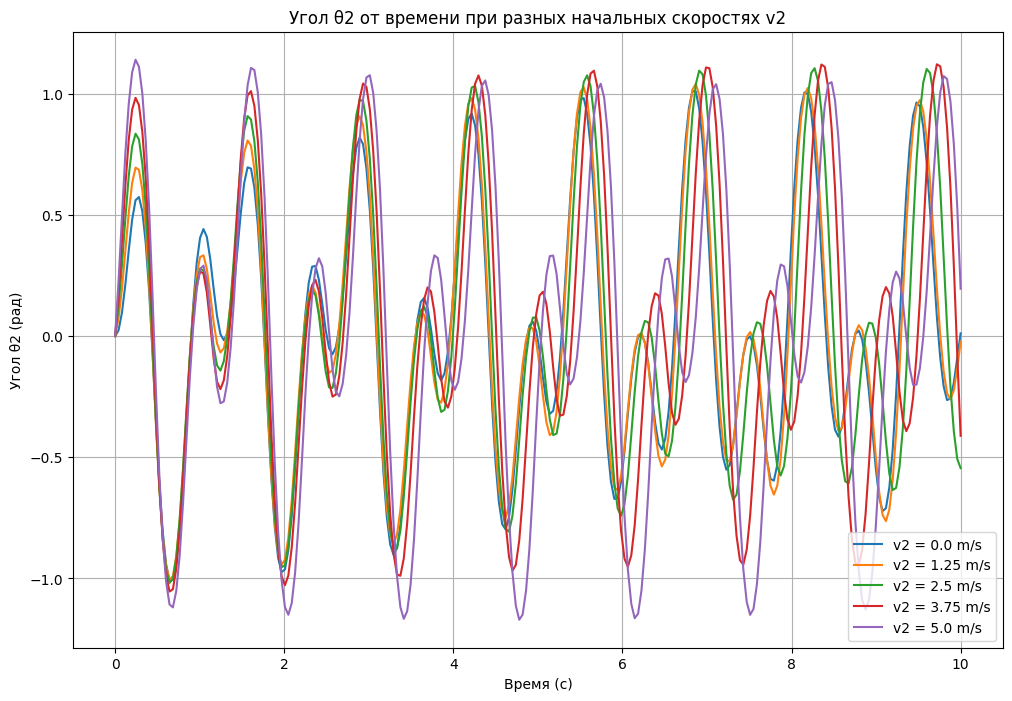

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Уравнения движения двойного маятника
def equations(y, t, m1, m2, l1, l2, g):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)

    theta2_dot = z2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return theta1_dot, z1_dot, theta2_dot, z2_dot

# Функция для расчета движения маятника с заданной начальной скоростью v2
def simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g):
    y0_v2 = [a1, 0, a2, v2]  # начальные условия с заданной скоростью v2
    solution = odeint(equations, y0_v2, t, args=(m1, m2, l1, l2, g))
    return solution

# Временной диапазон
t = np.linspace(0, 10, 250)  # 10 секунд

# Диапазон начальных скоростей v2 для исследования
v2_values = np.linspace(0, 5, 5)  # от 0 до 5 м/с с шагом 1 м/с

# Результаты для различных начальных скоростей v2
results = {}
for v2 in v2_values:
    results[v2] = simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g)

# Визуализация результатов
plt.figure(figsize=(12, 8))
for v2, result in results.items():
    theta1, z1, theta2, z2 = result.T
    plt.plot(t, theta2, label=f'v2 = {v2} m/s')  # Изменено на theta2

plt.title('Угол θ2 от времени при разных начальных скоростях v2')
plt.xlabel('Время (с)')
plt.ylabel('Угол θ2 (рад)')
plt.legend()
plt.grid(True)
plt.show()

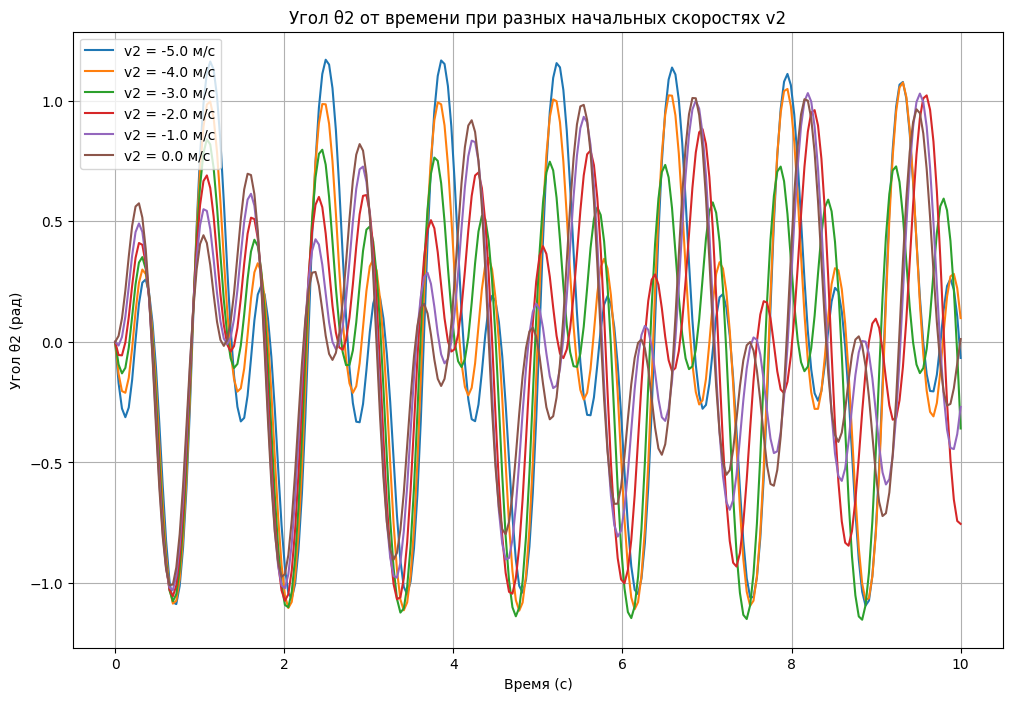

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Уравнения движения двойного маятника
def equations(y, t, m1, m2, l1, l2, g):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1_dot = z1
    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)

    theta2_dot = z2
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return theta1_dot, z1_dot, theta2_dot, z2_dot

# Функция для расчета движения маятника с заданной начальной скоростью v2
def simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g):
    y0_v2 = [a1, 0, a2, v2]  # начальные условия с заданной скоростью v2
    solution = odeint(equations, y0_v2, t, args=(m1, m2, l1, l2, g))
    return solution

# Временной диапазон
t = np.linspace(0, 10, 250)  # 10 секунд

# Диапазон начальных скоростей v2 для исследования
v2_values = np.linspace(-5, 0, 6)  # от -5 до 0 м/с с шагом 1 м/с

# Результаты для различных начальных скоростей v2
results = {}
for v2 in v2_values:
    results[v2] = simulate_mayaтник_with_v2(v2, t, m1, m2, l1, l2, g)

# Визуализация результатов
plt.figure(figsize=(12, 8))
for v2, result in results.items():
    theta1, z1, theta2, z2 = result.T
    plt.plot(t, theta2, label=f'v2 = {v2} м/с')  # Изменено на theta2

plt.title('Угол θ2 от времени при разных начальных скоростях v2')
plt.xlabel('Время (с)')
plt.ylabel('Угол θ2 (рад)')
plt.legend()
plt.grid(True)
plt.show()